In [75]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [76]:
df = pd.read_json('data/movies-1997.json')
df

,productId,userId,profileName,helpfulness,score,time,summary,text,year,month,day
39861,B000ZHUFSK,ABSN7210FTTOJ,antonio,7/15,3,882489600000,Boy and girl marooned on tropical island,This is the travelogue version of the venerabl...,1997,12,19
124341,B000KJU128,A1PS66N855AO4D,cdunigan@hotmail.com,3/3,5,882144000000,Share it with your children,The Last Unicorn is a fairy tale in the best s...,1997,12,15
129373,630305904X,A3178BLWUBFAGI,GGood5007@aol.com,3/3,4,882662400000,Orlando as Everyman,Woolf's Orlando is the story of a young noblem...,1997,12,21
300202,B003Q7B78S,A3178BLWUBFAGI,GGood5007@aol.com,3/3,4,882662400000,Orlando as Everyman,Woolf's Orlando is the story of a young noblem...,1997,12,21
366754,B00006SFN8,A12YGS1VEV0WXS,joelor@mulberry.com,0/0,4,882144000000,This is just an amazing chronology of a person...,If you are interested in a person's life - the...,1997,12,15
...,...,...,...,...,...,...,...,...,...,...,...
7438585,6305012822,ABSN7210FTTOJ,antonio,0/6,5,882921600000,Gibson's directorial debut in an unusual romance,Based on Isabelle Holland's story of the love ...,1997,12,24
7523758,B000085RJ7,A1PS66N855AO4D,cdunigan@hotmail.com,3/3,5,882144000000,Share it with your children,The Last Unicorn is a fairy tale in the best s...,1997,12,15
7553112,6301965841,A2RS7C6FE0RG6L,NoName,23/24,5,882835200000,Outstanding dance musical from Busky Berkeley.,This is probably one of the best movies ever m...,1997,12,23
7629209,B005DKS1XK,A2UGPIQW4XSIY4,David E. West,28/29,5,882921600000,Sing along with this Christmas classic!,This musical version of Charles Dickens' A Chr...,1997,12,24


In [77]:
G = nx.Graph()
G.add_nodes_from(df['userId'], type='person', bipartite=0,)
G.add_nodes_from(df['productId'], type='movie', bipartite=1)
G.add_edges_from(df[['productId', 'userId']].values)

colors = ['red' if G.nodes[node]['type'] == 'person' else 'blue' for node in G.nodes()]

In [80]:
G.number_of_nodes()

126

In [81]:
G.number_of_edges()

108

In [78]:
nx.write_gexf(G, 'generated_graphs/bipartite-1997.gexf')

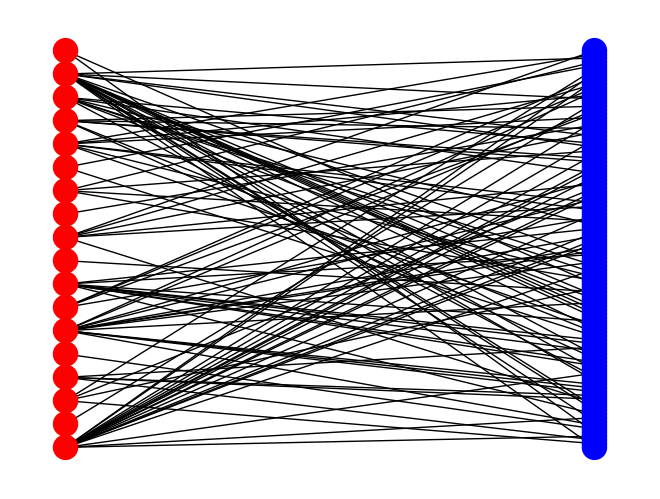

In [79]:
pos = nx.bipartite_layout(G, df.userId)
nx.draw(G, pos=pos, with_labels=False, node_color=colors)
plt.savefig("generated_graphs/network-viz-1997.png", format="PNG")